# BCycle Austin models

This notebook concludes the BCycle Austin series of blog posts, and looks at how machine learning could be used to help the BCycle team. I'll be using weather data in addition to the station and bike information, and building models which I hope might be useful. Let's get started !

## Imports and data loading

Before getting started, let's import some useful libraries for visualization, and the bcycle utils library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

from bcycle_lib.utils import *

%matplotlib inline
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading and cleaning weather data

I used [Weather Underground](https://www.wunderground.com/history/airport/KATT/2016/4/1/CustomHistory.html?dayend=3 1&monthend=5&yearend=2016&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1) to download a CSV with daily weather information from Austin's Camp Mabry station (KATT). This includes the following data fields.

* Date
* Min, mean, and max:
  * Temperature (degrees Fahreinheit)
  * Dew Point (degrees Fahreinheit)
  * Humidity (%)
  * Sea Level Pressure (inches)
  * Visibility (miles)
  * Wind speed (mph)
* Max gust (mph)
* Precipitation (inches)
* Events (combinations of Fog, Rain, Thunderstorm)

There are likely to be a lot of highly correlated fields in the data, so I'll check these columns and drop them if needed. 

In [2]:
weather_df = load_weather()
weather_df.describe()


,max_temp,min_temp,max_humidity,min_humidity,max_pressure,min_pressure,max_wind,min_wind,max_gust,precipitation,cloud_pct
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,81.901639,62.360656,90.721311,53.475410,30.045246,29.867213,13.737705,5.295082,22.770492,0.235410,55.532787
std,5.682443,7.122810,8.374826,17.527699,0.121197,0.134872,3.224395,1.676745,5.643266,0.424349,34.348442
min,66.000000,44.000000,66.000000,15.000000,29.760000,29.540000,8.000000,2.000000,13.000000,0.000000,0.000000
25%,78.000000,58.000000,87.000000,40.000000,29.980000,29.780000,12.000000,4.000000,19.000000,0.000000,37.500000
50%,83.000000,63.000000,93.000000,56.000000,30.070000,29.900000,14.000000,5.000000,22.000000,0.010000,62.500000
75%,87.000000,67.000000,97.000000,67.000000,30.120000,29.960000,16.000000,7.000000,26.000000,0.310000,87.500000
max,91.000000,77.000000,100.000000,84.000000,30.320000,30.180000,21.000000,9.000000,37.000000,2.250000,100.000000


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2016-04-01 to 2016-05-31
Data columns (total 14 columns):
max_temp         61 non-null uint8
min_temp         61 non-null uint8
max_humidity     61 non-null uint8
min_humidity     61 non-null uint8
max_pressure     61 non-null float64
min_pressure     61 non-null float64
max_wind         61 non-null uint8
min_wind         61 non-null uint8
max_gust         61 non-null uint8
precipitation    61 non-null float32
cloud_pct        61 non-null float32
thunderstorm     61 non-null bool
fog              61 non-null bool
rain             61 non-null bool
dtypes: bool(3), float32(2), float64(2), uint8(7)
memory usage: 2.5 KB


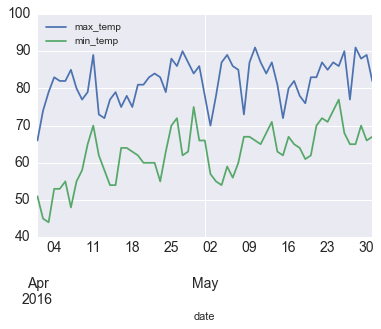

In [4]:
weather_df[['max_temp', 'min_temp']].plot.line(legend=True)

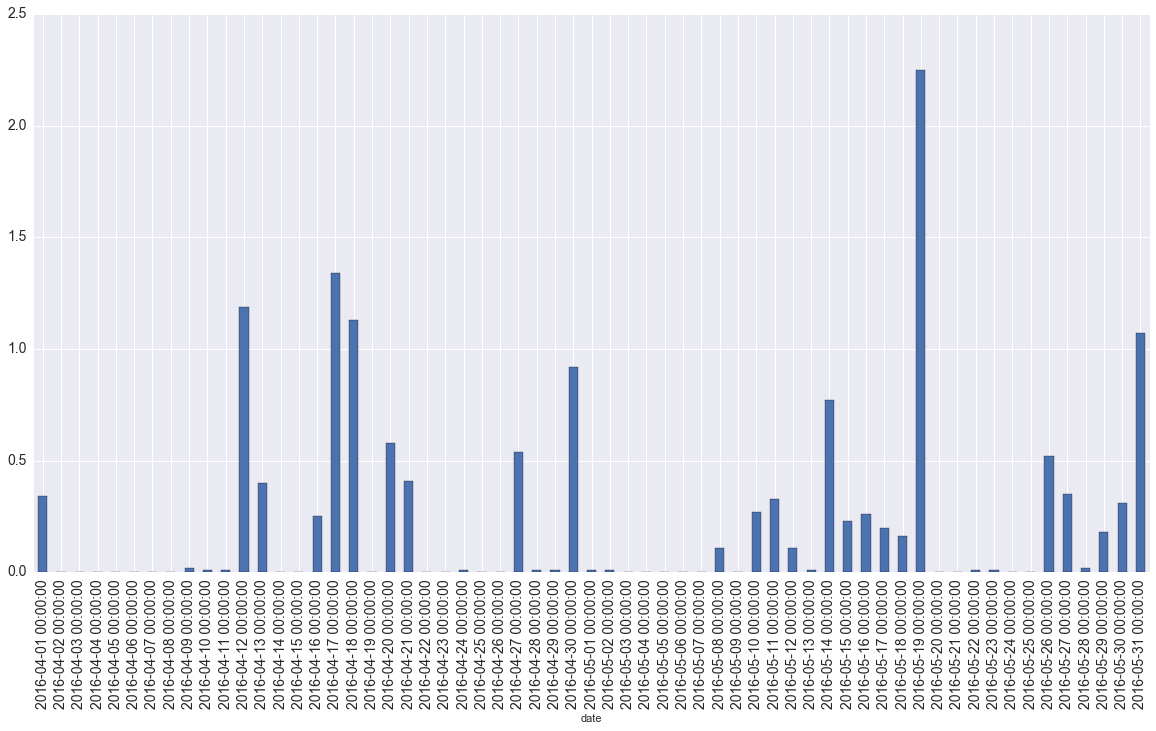

In [5]:
weather_df['precipitation'].plot.bar(figsize=(20,10))